<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torge

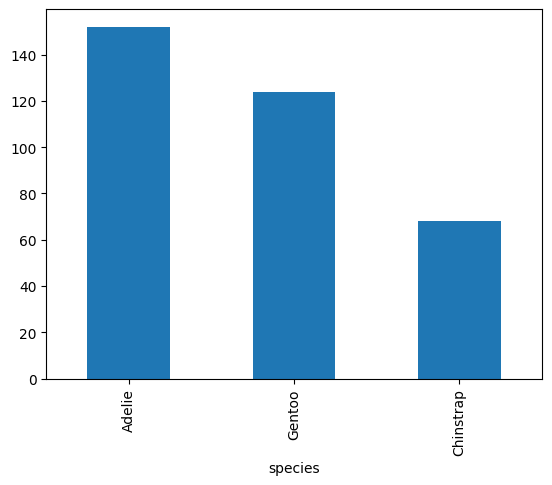

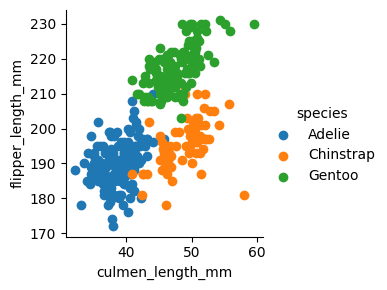

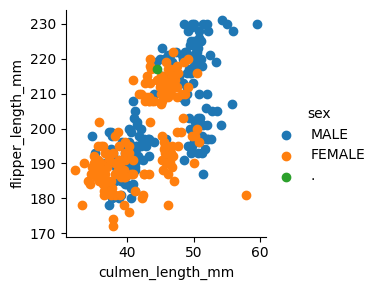

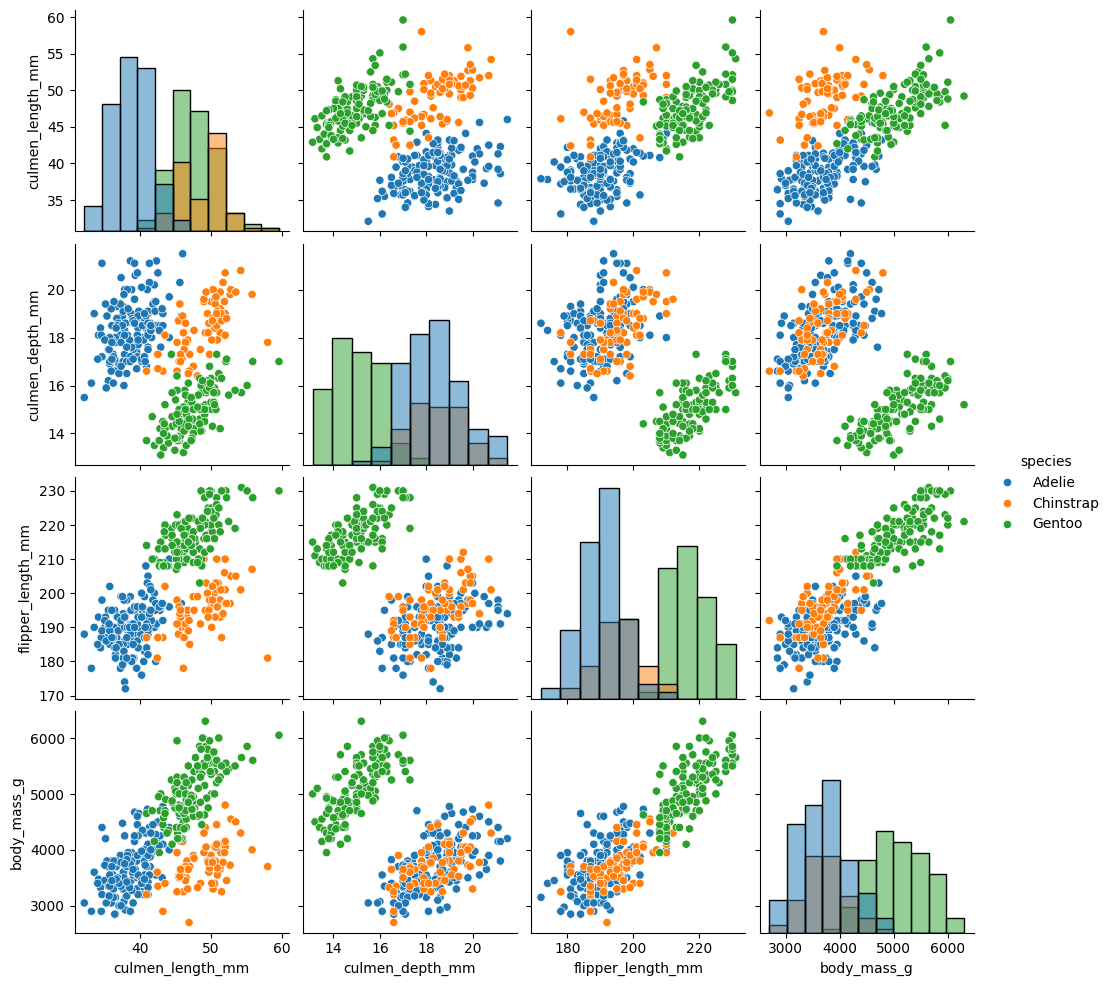

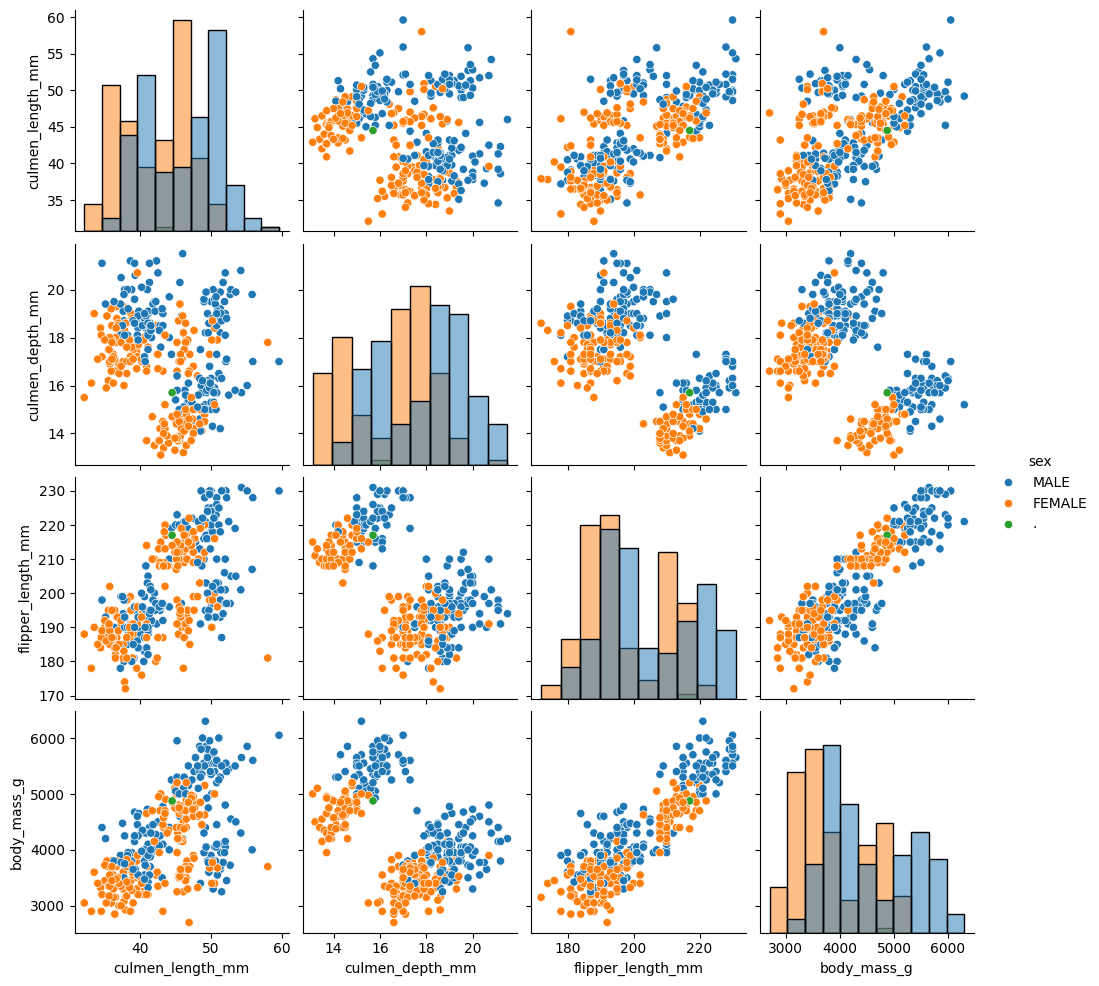

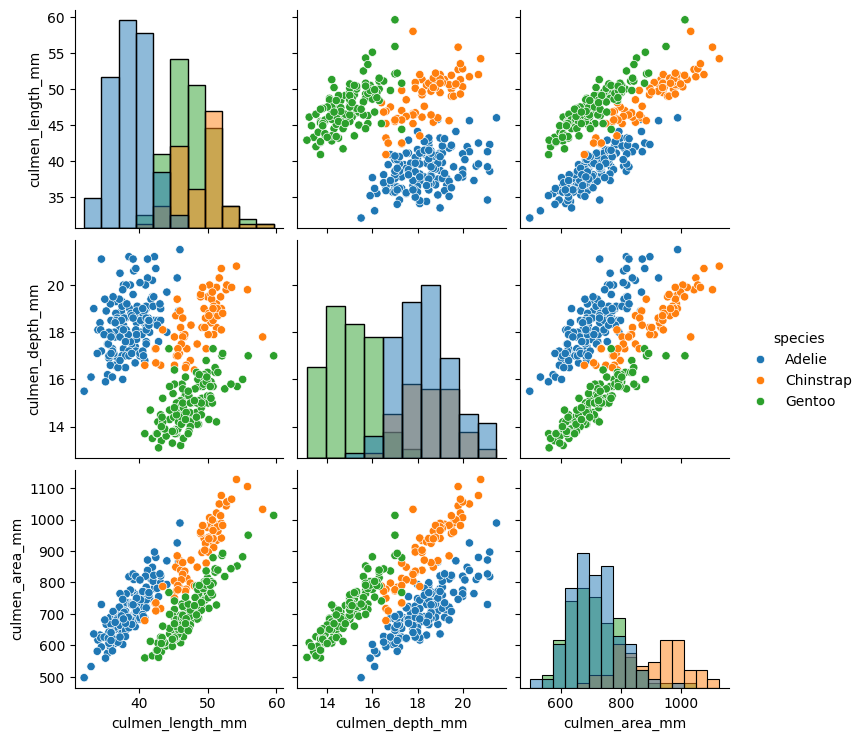

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## ===============  SKELETON FOR PART C  =================
class Pingu:
  def __init__(self, species, island, clength, cdepth, flength, bmi, sex):
    self.species = species
    self.island = island
    self.clength = clength
    self.cdepth = cdepth
    self.flength = flength
    self.bmi = bmi
    self.sex = sex
  
  def computeArea(self):
    return self.clength * self.cdepth
    
## =======================================================

## Part A: Initialize Data
df_size = pd.read_csv('./pingu/penguins_size.csv')

print(df_size.info())
print(df_size.head())
print(df_size.describe())

## Part B.1: Counter with bar plot
bar1 = df_size['species'].value_counts().plot(kind='bar')
bar1.figure.savefig('./cx_out/bar1.png')

## Part B.2: Investigate different facet grids for species and sex. 
##           Which is better suited?

rp1 = sns.FacetGrid(df_size, hue="species").map(plt.scatter, "culmen_length_mm", "flipper_length_mm").add_legend()
rp1.figure.savefig('./cx_out/fg1.png')

rp2 = sns.FacetGrid(df_size, hue="sex").map(plt.scatter, "culmen_length_mm", "flipper_length_mm").add_legend()
rp2.figure.savefig('./cx_out/fg2.png')


## Part B.3: Investigate different pairplots for species and sex. 
##           Which is better suited?

pair1 = sns.pairplot(df_size, hue="species", diag_kind='hist')
pair1.figure.savefig('./cx_out/pair1.png')

pair2 = sns.pairplot(df_size, hue="sex", diag_kind='hist')
pair2.figure.savefig('./cx_out/pair2.png')


### Part C: Compute Culmen surface using the Pingu-class
##          Attributes: species,island,culmen_length_mm,culmen_depth_mm,
##                      flipper_length_mm,body_mass_g,sex
c_area = []

for i in range(df_size.shape[0]):
  curr_pingu = Pingu(df_size.loc[i,["species"]], df_size.loc[i,["island"]], df_size.loc[i,["culmen_length_mm"]].item(), df_size.loc[i,["culmen_depth_mm"]].item(), df_size.loc[i,["flipper_length_mm"]], df_size.loc[i,["body_mass_g"]],df_size.loc[i,["sex"]])
  curr_area = curr_pingu.computeArea().item()
  c_area.append(curr_area)

print(c_area)
df_size['culmen_area_mm'] = c_area
print(df_size)

df2 = df_size.loc[:, ["culmen_length_mm", "culmen_depth_mm", "culmen_area_mm", "species"]]
print(df2)

pair_new = sns.pairplot(df2, hue="species", diag_kind='hist')
pair_new.figure.savefig('./cx_out/pair_new.png')
print(df2.describe())

## Facet Grid Chart

In [4]:
df_size

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_area_mm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,731.17
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,687.30
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,725.40
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,708.31
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,669.24
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,791.28
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,668.96


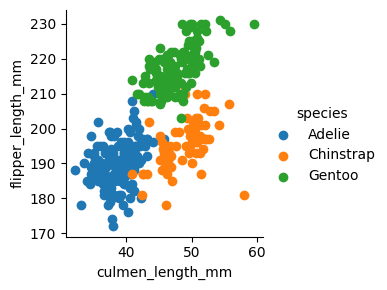

In [6]:
sns.FacetGrid(df_size, hue="species").map(plt.scatter, "culmen_length_mm", "flipper_length_mm").add_legend()

## Pair plot chart

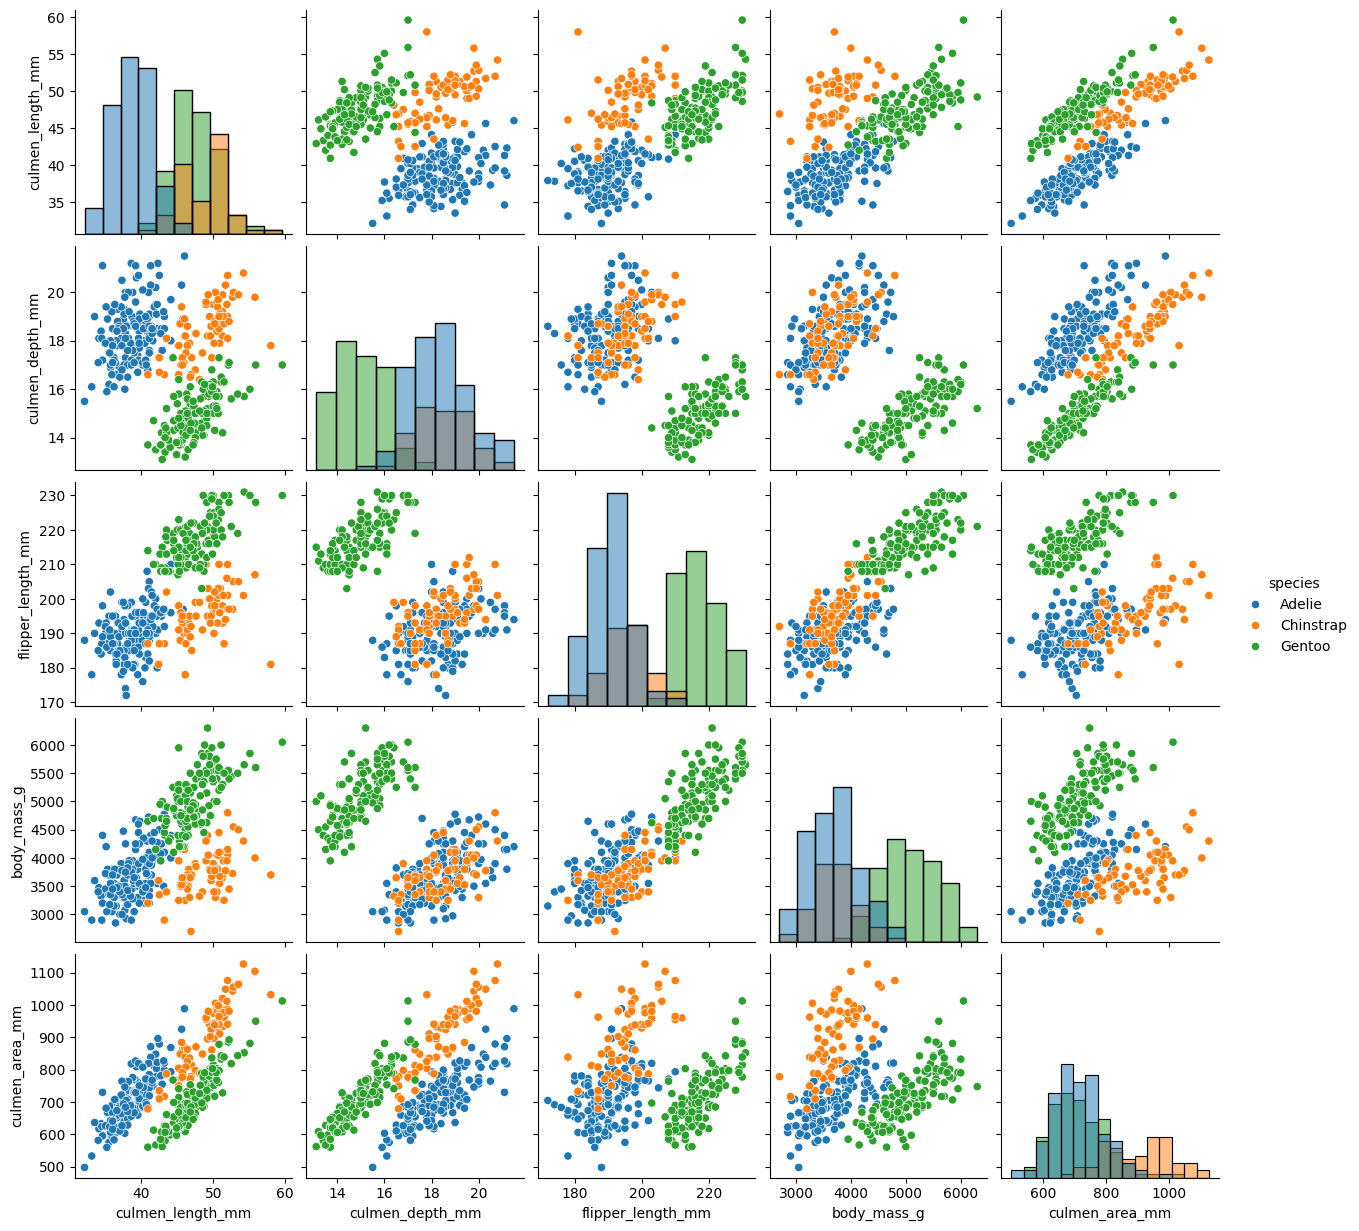

In [7]:
sns.pairplot(df_size, hue="species", diag_kind='hist')